# Part III. Application: Wine Quality Prediction

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 1. Data Preparation

In [3]:
# Part a
wine_data = pd.read_csv('winequality-red.csv', sep=';')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# part b
X = wine_data.drop("quality", axis=1)
y = wine_data['quality']
scaler = StandardScaler()

# Fit and transform the data using the scaler
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the standardized features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the standardized features
print(X_scaled_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707  \
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates   
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207  \
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  


In [5]:
# part c
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1279, 11) (1279,)
Testing set shape: (320, 11) (320,)


## 2. Model Design

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are already prepared from the previous steps

# Create a sequential model
model = Sequential()

# Add the layers as specified
model.add(Dense(11, input_dim=11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation=None))



## 3. Model Training

In [7]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# Set aside 10% of the training data as validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=10, validation_data=(X_val, y_val))

# Evaluate the model on the testing set

evaluation_results = model.evaluate(X_test, y_test)
loss, mse, mae = evaluation_results
print(f"Mean Squared Error on Testing Set: {mse}")
print(f"Mean Absolute Error on Testing Set: {mae}")


Epoch 1/25
116/116 [==============================] - 1s 3ms/step - loss: 14.7581 - mean_squared_error: 14.7581 - mean_absolute_error: 3.5469 - val_loss: 6.6125 - val_mean_squared_error: 6.6125 - val_mean_absolute_error: 2.1941
Epoch 2/25
116/116 [==============================] - 0s 2ms/step - loss: 4.0582 - mean_squared_error: 4.0582 - mean_absolute_error: 1.6398 - val_loss: 2.4501 - val_mean_squared_error: 2.4501 - val_mean_absolute_error: 1.1954
Epoch 3/25
116/116 [==============================] - 0s 1ms/step - loss: 2.0113 - mean_squared_error: 2.0113 - mean_absolute_error: 1.1107 - val_loss: 1.5130 - val_mean_squared_error: 1.5130 - val_mean_absolute_error: 0.9386
Epoch 4/25
116/116 [==============================] - 0s 1ms/step - loss: 1.3637 - mean_squared_error: 1.3637 - mean_absolute_error: 0.9095 - val_loss: 1.1368 - val_mean_squared_error: 1.1368 - val_mean_absolute_error: 0.8204
Epoch 5/25
116/116 [==============================] - 0s 1ms/step - loss: 1.0808 - mean_square

## 4. Model Evaluation

In [8]:
from sklearn.metrics import r2_score

history = model.fit(X_train, y_train, epochs=25, batch_size=10, validation_data=(X_val, y_val))

# (f) Evaluate the model on the validation set
validation_results = model.evaluate(X_val, y_val)
val_loss, val_mse, val_mae = validation_results

print("\nValidation Results:")
print(f"Mean Squared Error on Validation Set: {val_mse}")
print(f"Mean Absolute Error on Validation Set: {val_mae}")
print(f"Final Loss (MSE) on Validation Set: {val_loss}")

# (g) Assess the trained model’s performance on the test set
test_results = model.evaluate(X_test, y_test)
test_loss, test_mse, test_mae = test_results

# Calculate R^2 score for the test set
y_test_pred = model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)

print("\nTest Results:")
print(f"Mean Squared Error on Test Set: {test_mse}")
print(f"Mean Absolute Error on Test Set: {test_mae}")
print(f"R^2 Score on Test Set: {r2}")


Epoch 1/25
116/116 [==============================] - 0s 2ms/step - loss: 0.4255 - mean_squared_error: 0.4255 - mean_absolute_error: 0.5066 - val_loss: 0.4420 - val_mean_squared_error: 0.4420 - val_mean_absolute_error: 0.4858
Epoch 2/25
116/116 [==============================] - 0s 1ms/step - loss: 0.4349 - mean_squared_error: 0.4349 - mean_absolute_error: 0.5136 - val_loss: 0.4189 - val_mean_squared_error: 0.4189 - val_mean_absolute_error: 0.4931
Epoch 3/25
116/116 [==============================] - 0s 1ms/step - loss: 0.4182 - mean_squared_error: 0.4182 - mean_absolute_error: 0.5002 - val_loss: 0.4084 - val_mean_squared_error: 0.4084 - val_mean_absolute_error: 0.4863
Epoch 4/25
116/116 [==============================] - 0s 2ms/step - loss: 0.4138 - mean_squared_error: 0.4138 - mean_absolute_error: 0.5004 - val_loss: 0.4079 - val_mean_squared_error: 0.4079 - val_mean_absolute_error: 0.4804
Epoch 5/25
116/116 [==============================] - 0s 1ms/step - loss: 0.4113 - mean_squared_

## 5. Visualization

Epoch 1/25
116/116 [==============================] - 0s 2ms/step - loss: 0.3599 - mean_squared_error: 0.3599 - mean_absolute_error: 0.4625 - val_loss: 0.3840 - val_mean_squared_error: 0.3840 - val_mean_absolute_error: 0.4640
Epoch 2/25
116/116 [==============================] - 0s 1ms/step - loss: 0.3607 - mean_squared_error: 0.3607 - mean_absolute_error: 0.4604 - val_loss: 0.3777 - val_mean_squared_error: 0.3777 - val_mean_absolute_error: 0.4662
Epoch 3/25
116/116 [==============================] - 0s 1ms/step - loss: 0.3556 - mean_squared_error: 0.3556 - mean_absolute_error: 0.4589 - val_loss: 0.3801 - val_mean_squared_error: 0.3801 - val_mean_absolute_error: 0.4764
Epoch 4/25
116/116 [==============================] - 0s 1ms/step - loss: 0.3667 - mean_squared_error: 0.3667 - mean_absolute_error: 0.4713 - val_loss: 0.3782 - val_mean_squared_error: 0.3782 - val_mean_absolute_error: 0.4629
Epoch 5/25
116/116 [==============================] - 0s 1ms/step - loss: 0.3532 - mean_squared_

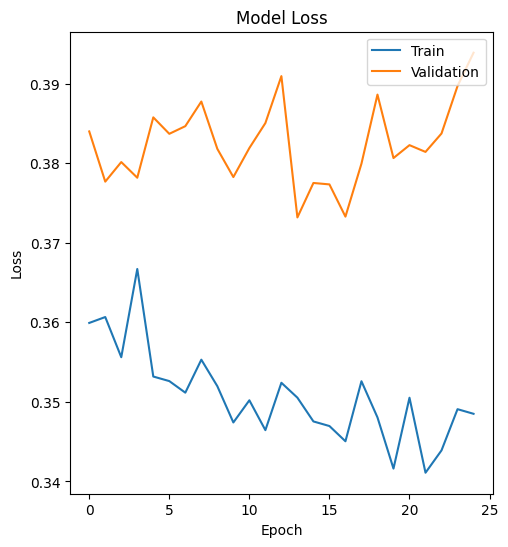

In [10]:
import matplotlib.pyplot as plt
# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=10, validation_data=(X_val, y_val))

# (h) Create a plot for the learning curves
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')




4/4 [==============================] - 0s 0s/step


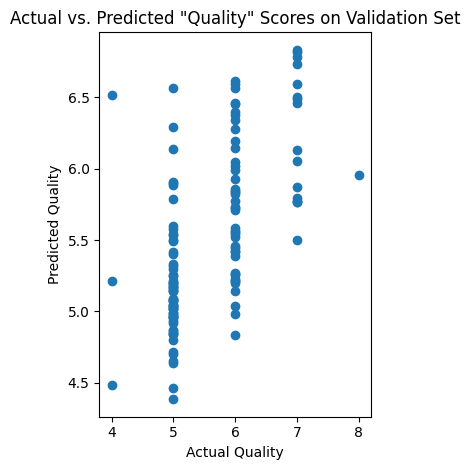

In [11]:
# (i) Construct a scatter plot for actual vs. predicted "quality" scores
plt.subplot(1, 2, 2)
y_val_pred = model.predict(X_val)

plt.scatter(y_val, y_val_pred)
plt.title('Actual vs. Predicted "Quality" Scores on Validation Set')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')

plt.tight_layout()
plt.show()